# 필수과제 1  
- NA값이 있는 데이터를 공유 받고
- 해당 NA값들을 수업에서 나온 방법을 가지고 실제 결측치를 대체하기.  
- 결측치를 대체한 후에 groupby를 통한 다른 피처들과의 관계를 비교하면서 값들이 어떤 식으로 대체 되었는지를 정리.  

### 필수과제 1-1
- 4개의 피처가 있는데, 1개 피처만 NA값이 있어서 -> 이걸 수업에서 나온 방법으로 대체한 후에, 다른 컬럼들과의 관계를 통해서 어떤 식으로 값들이 변화하는지

### 필수과제 1-2
- 기존의 원본데이터와, NA값을 대체한 데이터들의 차이를 비교해서 정리.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer
from sklearn.datasets import fetch_california_housing

In [2]:
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()

In [4]:
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target

In [63]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


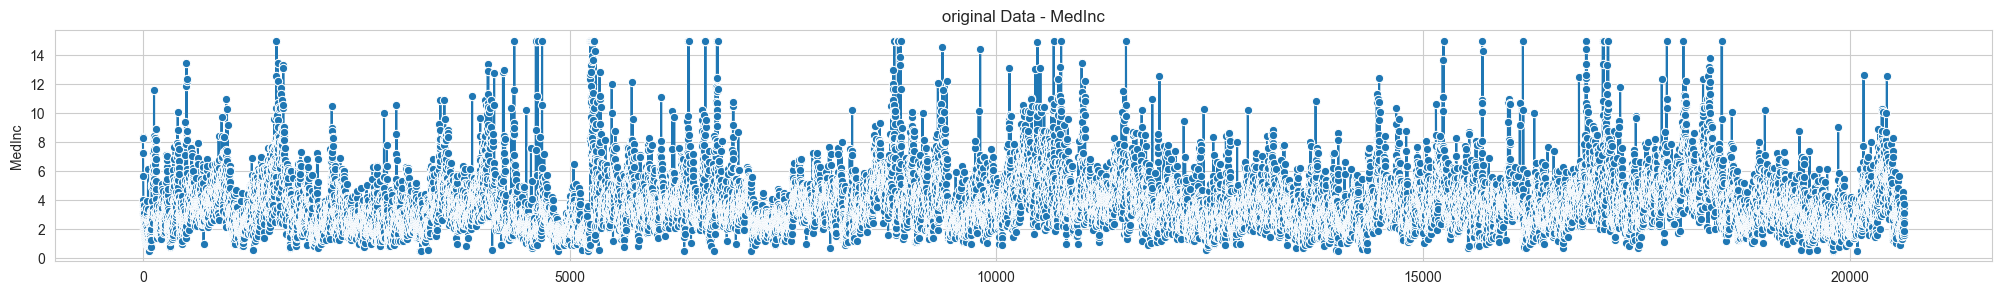

In [64]:
# MedInc 결측치로 대체 전 시각화 확인
plt.figure(figsize=(25, 3))
sns.lineplot(data=df_housing['MedInc'], marker='o')
plt.title('original Data - MedInc')
plt.show()

In [65]:
# MedInc의 값을 결측치로 대체 (0번째와 짝수번째 데이터만)
df_housing.loc[0:20640:2, 'MedInc'] = np.nan

In [66]:
# 적용이 되었는지 확인한다
df_housing[0:20640]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,NaN,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,NaN,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<function matplotlib.pyplot.show(close=None, block=None)>

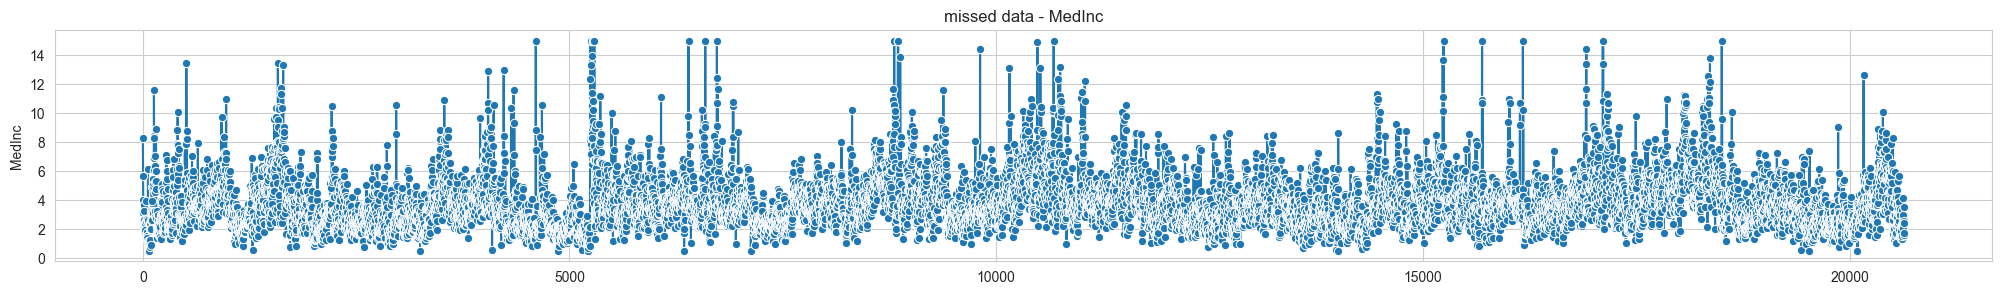

In [56]:
# 결측 데이터를 시각화해보자
plt.figure(figsize=(25,3))
sns.lineplot(data=df_housing.loc[:26040, 'MedInc'], marker='o')
plt.title('missed data - MedInc')
plt.show

In [59]:
# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice = mice_imputer.fit_transform(df_housing)
df_mice = pd.DataFrame(df_mice, columns =df_housing.columns)

In [69]:
df_mice

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,7.021672,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,6.974807,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,5.286637,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.380911,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,2.340702,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<function matplotlib.pyplot.show(close=None, block=None)>

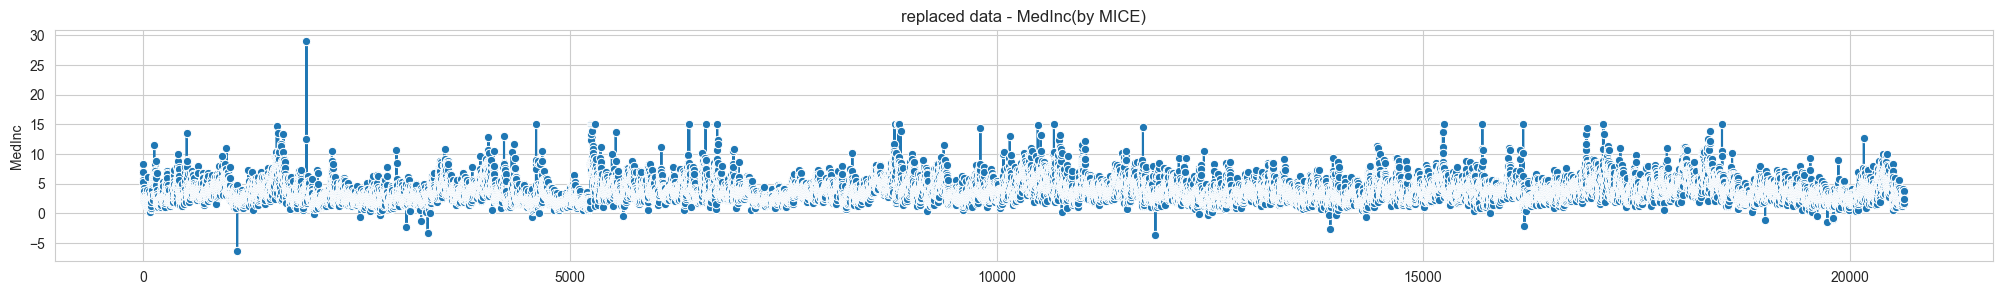

In [79]:
#  MICE 다중대치법으로 대체한 데이터를 시각화 해보자
plt.figure(figsize=(25,3))
sns.lineplot(data=df_mice.loc[:26040, 'MedInc'], marker='o')
plt.title('replaced data - MedInc(by MICE)')
plt.show

### 필수과제 1-1

In [68]:
# 원본 데이터를 다시 불러오자
original_housing = fetch_california_housing()
df_original_housing = pd.DataFrame(original_housing.data, columns=original_housing.feature_names)
df_original_housing['Target'] = original_housing.target
df_original_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 오리지널 데이터와 mice 다중대치법으로 결측치를 대체한 데이터를 비교해보자.

In [75]:
# MedInc 열에 대해 mean, var, standard_error 등을 구해보자. (original data)
print("original MedInc mean :", df_original_housing['MedInc'].mean())
print("original MedInc var :", df_original_housing['MedInc'].var())
print("original MedInc standard_error :", df_original_housing['MedInc'].std())

original MedInc mean : 3.8706710029069766
original MedInc var : 3.6093225599765124
original MedInc standard_error : 1.8998217179452688


In [76]:
# MedInc 열에 대해 mean, var, standard_error 등을 구해보자. (replaced data(df_mice))
print("replaced MedInc mean :", df_mice['MedInc'].mean())
print("replaced MedInc var :", df_mice['MedInc'].var())
print("replaced MedInc standard_error :", df_mice['MedInc'].std())

replaced MedInc mean : 3.8743120132909787
replaced MedInc var : 3.1197706284009254
replaced MedInc standard_error : 1.766287244023725


- 오리지널 데이터와 mice 다중대치법으로 대체된 데이터와 별로 차이가 나지 않는다.
- mice 알고리즘은 다음과 같은 과정을 거치며 결측치를 대체한다.
결측치가 있는 열을 제외한 나머지 열들을 이용하여 결측치를 예측하고
예측된 결측치를 사용하여 결측치를 대체한다.
이 과정을 반복하여 여러 개의 대체 데이터셋을 생성한다.
생성된 여러 개의 대체 데이터셋으로 원본 데이터의 분포를 대략적으로 모사한다.

### 필수과제 1-2

Text(0.5, 1.0, 'replaced data - by MICE')

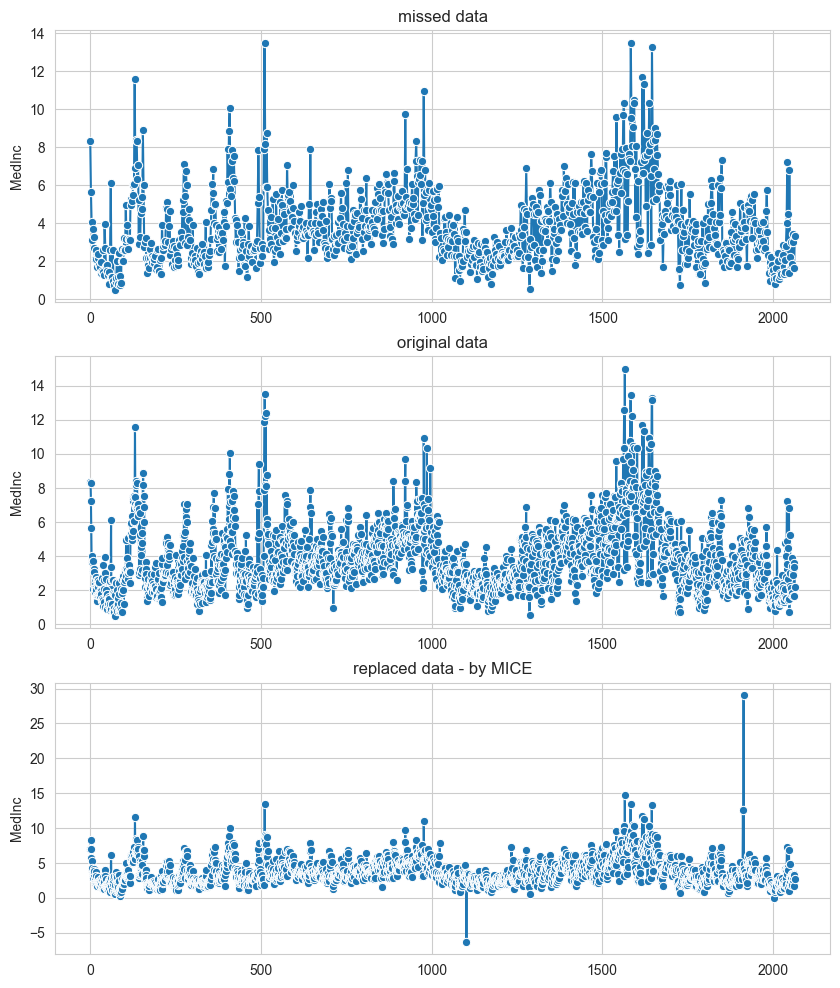

In [80]:
# 오리지널 데이터, 결측치가 만들어진 데이터, 결측치를 mice으로 대체한 값을 그래프로 표현
# 모든 행을 보면 보기가 힘들기에, 전체 행의 개수의 10%인 2064개의 데이터만 그래프에 나타낸다.
fig, axs = plt.subplots(3,1,figsize=(10,12))
sns.lineplot(data=df_original_housing.loc[:2064, 'MedInc'] , marker='o', ax=axs[1], legend='auto') # 오리지널 데이터
axs[1].set_title('original data')
sns.lineplot(data=df_housing.loc[:2064, 'MedInc'], marker='o', ax=axs[0], legend='auto') # 결측치가 만들어진 데이터
axs[0].set_title('missed data')
sns.lineplot(data=df_mice.loc[:2064, 'MedInc'] , marker='o', ax=axs[2], legend='auto')
axs[2].set_title('replaced data - by MICE')

- 결측치를 대체한 그래프가 다른 값과 매우 붙어있는 모습을 보여준다.